In [ ]:
!pip3 install requirements.txt

### Importing Libraries

In [28]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pickle
import seaborn as sn
%matplotlib inline

### Fetching MNIST dataset
* Fetching the data
* Checking the number of columns or features to get the better understanding of data


In [29]:
mnist = fetch_openml('mnist_784',version=1)

/opt/homebrew/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [31]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### Splitting the data

In [35]:
x,y = mnist['data'],mnist['target']

In [36]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
x.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

### Lets see what happens when we convert one instance of x into a 28x28 array ?

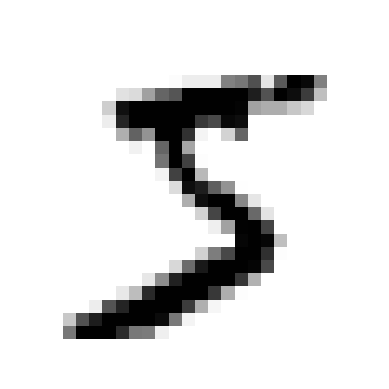

In [10]:
digit = np.array(x.iloc[0])
digit_image = digit.reshape(28,28)
plt.imshow(digit_image,cmap="binary")
plt.axis('off')
plt.show()

In [11]:
y.iloc[0]

'5'

In [12]:
x_train , x_test , y_train , y_test = x.iloc[:60000], x.iloc[60000:], y.iloc[:60000], y.iloc[60000:]

In [13]:
# As we are trying to identify digits, so we need to convert the target or y into a integer
y_train, y_test = y_train.astype(np.uint8), y_test.astype(np.uint8)

### Model Training

In [22]:
model = LogisticRegression()
model.fit(x_train, y_train)

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10, tol=0.1)

### Calculating accuracy

In [23]:
model.score(x_test, y_test)

0.8888

### Prediction

In [24]:
model.predict([x_test.iloc[32]])

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [25]:
y_test.iloc[32]

3

### Evaluating Metrics

In [26]:
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)
cm

array([[ 937,    0,    6,    4,    1,    8,   12,    1,   11,    0],
       [   0, 1091,    3,    9,    1,    1,    5,    0,   25,    0],
       [  15,    2,  883,   14,   15,    3,   28,   24,   40,    8],
       [   7,    1,   19,  876,    0,   46,    8,   16,   26,   11],
       [   2,    5,    6,    1,  895,    0,   17,    2,    8,   46],
       [  15,    6,    3,   37,   24,  710,   20,    8,   58,   11],
       [  17,    3,    8,    2,   12,   14,  889,    1,   12,    0],
       [   4,   18,   35,    3,   12,    0,    2,  913,    6,   35],
       [   6,    9,   14,   30,   11,   24,   16,   19,  832,   13],
       [   7,    8,   10,   10,   57,   15,    1,   27,   12,  862]])

Text(95.72222222222221, 0.5, 'Truth')

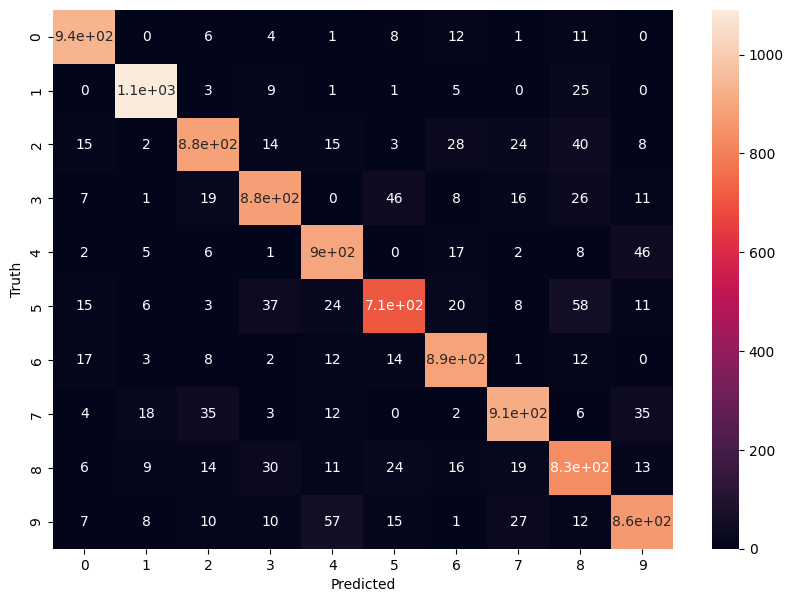

In [27]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Exporting model

In [36]:
pickle.dump(model,open("digit_classification_model.pkl",'wb'))